In [185]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline

(1221, 1646)


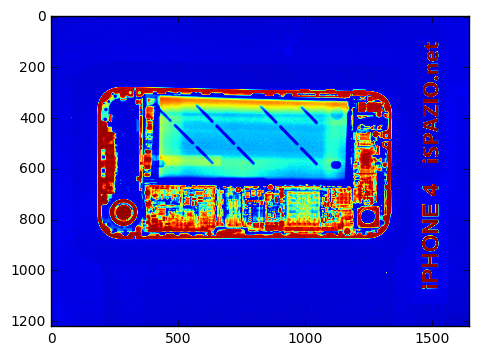

In [ ]:
iphone=cv2.imread('xray-iphone-4.jpg',0)
print(iphone.shape)
plt.imshow(iphone)

In [ ]:
ret,thresh1 = cv2.threshold(iphone,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(iphone,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(iphone,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(iphone,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(iphone,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [iphone, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
ret,th1 = cv2.threshold(iphone,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(iphone,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(iphone,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [iphone, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
# global thresholding
ret1,th1 = cv2.threshold(iphone,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(iphone,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(iphone,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [iphone, 0, th1,
          iphone, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
cv2.imwrite('gray.png',images[8])

In [ ]:
kernel = np.ones((5,5),np.uint8)
gray=cv2.imread('gray.png')
opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

plt.subplot(121),plt.imshow(opening,cmap = 'gray')
plt.title('Opening Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing,cmap = 'gray')
plt.title('closing Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
closing1=closing
imgray = cv2.cvtColor(closing1,cv2.COLOR_BGR2GRAY)
ret3,th3 = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
im2, contours, hierarchy = cv2.findContours(th3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
ctrimg=cv2.drawContours(closing1, contours, -1, (0,255,0), 3)
plt.imshow(ctrimg)

In [ ]:
area = cv2.contourArea(contours[101])
area

In [ ]:
max_area=0
Req_Contour=0
for i in range(len(contours)):
    if cv2.contourArea(contours[i])>max_area:
        max_area=cv2.contourArea(contours[i])
        Req_Contour=i
        


In [ ]:
max_area

In [ ]:
cnt=contours[Req_Contour]
new=cv2.drawContours(gray,cnt , -1, (100,120,255), 1)
plt.imshow(new)